# EDA

In [4]:
pip install wordsegment

  Using cached wordsegment-1.3.1-py2.py3-none-any.whl.metadata (7.7 kB)
Using cached wordsegment-1.3.1-py2.py3-none-any.whl (4.8 MB)


In [5]:
import pandas as pd
import numpy as np
import re
from wordsegment import load, segment

In [ ]:
df = pd.read_csv("../data/videos.csv")

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92759 entries, 0 to 92758
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   kind                  92759 non-null  object 
 1   videoId               92759 non-null  int64  
 2   publishedAt           92759 non-null  object 
 3   channelId             92759 non-null  int64  
 4   title                 92759 non-null  object 
 5   description           35237 non-null  object 
 6   tags                  20891 non-null  object 
 7   defaultLanguage       15785 non-null  object 
 8   defaultAudioLanguage  29956 non-null  object 
 9   contentDuration       91492 non-null  object 
 10  viewCount             91490 non-null  float64
 11  likeCount             86630 non-null  float64
 12  favouriteCount        91492 non-null  float64
 13  commentCount          90294 non-null  float64
 14  topicCategories       91228 non-null  object 
dtypes: float64(4), int6

In [8]:
print(df.columns)

Index(['kind', 'videoId', 'publishedAt', 'channelId', 'title', 'description',
       'tags', 'defaultLanguage', 'defaultAudioLanguage', 'contentDuration',
       'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
       'topicCategories'],
      dtype='object')


In [9]:
# Drop unnecessary columns
df = df.drop(['kind', 'defaultAudioLanguage','defaultLanguage'], axis=1)

# Print remaining columns
print(df.columns)

Index(['videoId', 'publishedAt', 'channelId', 'title', 'description', 'tags',
       'contentDuration', 'viewCount', 'likeCount', 'favouriteCount',
       'commentCount', 'topicCategories'],
      dtype='object')


In [10]:
# Count null values per column
null_counts = df.isnull().sum()

# Show only columns with null values
print(null_counts[null_counts > 0])

description        57522
tags               71868
contentDuration     1267
viewCount           1269
likeCount           6129
favouriteCount      1267
commentCount        2465
topicCategories     1531
dtype: int64


In [11]:
cols = ['contentDuration', 'viewCount', 'topicCategories']
for col in cols:
    df = df.dropna(subset=[col])

# List of columns to fill with 0
num_cols = ['commentCount', 'likeCount', 'favouriteCount']

# Replace NaN with 0
df[num_cols] = df[num_cols].fillna(0)


In [12]:
# Print all unique values in topicCategories
print(df['topicCategories'].unique())

["['https://en.wikipedia.org/wiki/Health', 'https://en.wikipedia.org/wiki/Lifestyle_(sociology)']"
 "['https://en.wikipedia.org/wiki/Lifestyle_(sociology)', 'https://en.wikipedia.org/wiki/Physical_attractiveness']"
 "['https://en.wikipedia.org/wiki/Health', 'https://en.wikipedia.org/wiki/Lifestyle_(sociology)', 'https://en.wikipedia.org/wiki/Physical_attractiveness']"
 "['https://en.wikipedia.org/wiki/Lifestyle_(sociology)']"
 "['https://en.wikipedia.org/wiki/Entertainment', 'https://en.wikipedia.org/wiki/Physical_attractiveness']"
 "['https://en.wikipedia.org/wiki/Hobby', 'https://en.wikipedia.org/wiki/Lifestyle_(sociology)', 'https://en.wikipedia.org/wiki/Physical_attractiveness']"
 "['https://en.wikipedia.org/wiki/Fashion', 'https://en.wikipedia.org/wiki/Lifestyle_(sociology)', 'https://en.wikipedia.org/wiki/Physical_attractiveness']"
 "['https://en.wikipedia.org/wiki/Fashion', 'https://en.wikipedia.org/wiki/Physical_attractiveness']"
 "['https://en.wikipedia.org/wiki/Lifestyle_(soc

# Data Preprocessing

In [13]:
import ast

# Convert JSON-like strings into real lists
df['topicCategories'] = df['topicCategories'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Flatten into one list
all_topics = [topic for sublist in df['topicCategories'] for topic in sublist]

# Extract just the topic name from the URL (last part after '/')
topic_names = [topic.split('/')[-1] for topic in all_topics]

# Get unique topics
unique_topics = set(topic_names)

# Print results
print("Number of unique topics:", len(unique_topics))
print("Unique topics:", unique_topics)

Number of unique topics: 45
Unique topics: {'Food', 'Jazz', 'Performing_arts', 'Religion', 'Music_of_Latin_America', 'Knowledge', 'Sport', 'Technology', 'Role-playing_video_game', 'Business', 'Military', 'Action-adventure_game', 'Soul_music', 'Entertainment', 'Music_of_Asia', 'Health', 'Hobby', 'Country_music', 'Hip_hop_music', 'Strategy_video_game', 'Film', 'Humour', 'Tennis', 'Physical_fitness', 'Electronic_music', 'Sports_game', 'Lifestyle_(sociology)', 'Video_game_culture', 'Vehicle', 'Puzzle_video_game', 'Television_program', 'Mixed_martial_arts', 'Physical_attractiveness', 'Cricket', 'Pet', 'Basketball', 'Politics', 'Fashion', 'Pop_music', 'Music', 'Action_game', 'Casual_game', 'Tourism', 'Society', 'Rhythm_and_blues'}


In [14]:
# Create a new column with only topic names (no links)
df['topicNames'] = df['topicCategories'].apply(
    lambda lst: [t.split('/')[-1] for t in lst] if isinstance(lst, list) else []
)

print(df['topicNames'])

0                          [Health, Lifestyle_(sociology)]
1         [Lifestyle_(sociology), Physical_attractiveness]
2         [Lifestyle_(sociology), Physical_attractiveness]
3         [Lifestyle_(sociology), Physical_attractiveness]
4         [Lifestyle_(sociology), Physical_attractiveness]
                               ...                        
92754    [Fashion, Lifestyle_(sociology), Physical_attr...
92755    [Hobby, Lifestyle_(sociology), Physical_attrac...
92756    [Health, Lifestyle_(sociology), Physical_attra...
92757     [Lifestyle_(sociology), Physical_attractiveness]
92758     [Lifestyle_(sociology), Physical_attractiveness]
Name: topicNames, Length: 91226, dtype: object


In [15]:
# Combine the 3 no-hashtag columns into 1 column
df["text"] = (
    df["title"].fillna("") + " " +
    df["tags"].fillna("") + " " +
    df["description"].fillna("")
)

# Optional: clean extra spaces
df["text"] = df["text"].str.strip()

In [16]:
protected_words = {
    # Beauty / Skincare
    "makeup", "skincare", "haircare", "hairstyle", "hairstyles",
    "eyeshadow", "eyeliner", "lipstick", "lipgloss", "blush",
    "foundation", "concealer", "mascara", "highlighter", "contour",
    "serum", "facial", "antiaging", "glowup", "skintips",

    # Fashion
    "ootd", "fashionista", "streetwear", "vintage", "aesthetic",
    "styletips", "styleinspo", "luxurybrand", "runwaylook",

    # Platforms / Social Media
    "youtube", "tiktok", "instagram", "insta", "reels", "shorts",
    "fyp", "trending", "viralvideo", 'grwm'

    # Lifestyle
    "selfcare", "wellness", "bodycare", "nailart", "haircut",
    "weddinglook", "bridalmakeup", "partylook"
}


In [17]:
# Load wordsegment model once
load()

def segment_and_extract(text: str):
    if pd.isna(text):
        return "", []

    # Step 1: remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", str(text))

    # Step 2: insert space before inline hashtags (e.g., "shop#fun" → "shop #fun")
    text = re.sub(r'(?<!\s)(#)', r' \1', text)

    # Step 3: keep only letters, spaces, and hashtags
    text = re.sub(r"[^a-zA-Z# ]", " ", text).lower()

    words = text.split()
    hashtags = []
    normal_words = []

    for w in words:
        if w.startswith("#"):
            hashtags.append(w)   # preserve hashtags
        else:
            if w in protected_words:
                normal_words.append(w)   # keep intact if protected
            else:
                seg = segment(w)         # otherwise segment
                normal_words.extend(seg)

    return " ".join(normal_words), hashtags


# --- Apply only to "text" column ---
df["hashtags"] = ""

new_normals = []
new_hashtags = []

for text in df["text"]:
    normal, hashtags = segment_and_extract(text)
    new_normals.append(normal)
    new_hashtags.append(" ".join(hashtags))  # store hashtags as string

# update original text column (segmented, no hashtags)
df["text"] = new_normals

# fill hashtags column
df["hashtags"] = pd.Series(new_hashtags).str.strip()


In [18]:
from nltk.corpus import stopwords
import nltk

# download stopwords list (only need to run once)
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_words(text: str):
    if pd.isna(text):
        return ""

    words = text.lower().split()
    # keep only alphabetic words, not in stopwords, longer than 2 characters
    filtered = [w for w in words if w.isalpha() and w not in stop_words and len(w) > 2]
    return " ".join(filtered)

# apply to your text column
df["clean_text"] = df["text"].apply(clean_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
# Load wordsegment once
load()

def clean_hashtags(text: str) -> str:
    if pd.isna(text):
        return ""

    # Remove "#" symbols
    text = text.replace("#", " ")

    # Normalize spacing
    text = re.sub(r"\s+", " ", text).strip().lower()

    words = text.split()
    segmented_words = []

    for w in words:
        if w in protected_words:
            # keep intact if in protected list
            segmented_words.append(w)
        else:
            # segment other words normally
            seg = segment(w)
            segmented_words.extend(seg)

    return " ".join(segmented_words)

# Apply to your hashtags column
df["hashtags_cleaned"] = df["hashtags"].apply(clean_hashtags)

In [20]:
df["hashtags_cleaned"] = df["hashtags_cleaned"].apply(clean_words)

In [21]:
# Replace empty strings with NaN safely
df['hashtags_cleaned'] = df['hashtags_cleaned'].replace("", pd.NA)

# Fill NaN values with the corresponding value from 'clean_text'
df['hashtags_cleaned'] = df['hashtags_cleaned'].fillna(df['clean_text'])


In [22]:
def parse_iso8601_duration(duration: str):
    """
    Convert ISO 8601 duration (e.g., 'PT1H2M10S') to total seconds and HH:MM:SS string.
    """
    if not duration or not isinstance(duration, str):
        return 0, "00:00:00"

    # Regular expression to extract hours, minutes, seconds
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    match = pattern.match(duration)

    if not match:
        return 0, "00:00:00"

    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0

    total_seconds = hours * 3600 + minutes * 60 + seconds
    hh_mm_ss = f"{hours:02d}:{minutes:02d}:{seconds:02d}"

    return total_seconds, hh_mm_ss

# Apply to your DataFrame column
df['duration_seconds'], df['duration_hhmmss'] = zip(*df['contentDuration'].apply(parse_iso8601_duration))

# Save CSV

In [23]:
cols=['title', 'description', 'tags', 'contentDuration', 'topicCategories','text', 'hashtags', 'clean_text']
for col in cols:
  df = df.drop(col, axis=1)

print(df.columns)

In [24]:
# Save cleaned DataFrame to new CSV file
df.to_csv("cleaned_data.csv", index=False)

print("✅ File saved as cleaned_data.csv")


✅ File saved as cleaned_data.csv


# Identify Product Types

In [9]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from scipy.sparse import hstack, csr_matrix

In [10]:
product_type_df = pd.read_csv("cleaned_data.csv")

In [11]:
print(product_type_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91226 entries, 0 to 91225
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   videoId           91226 non-null  int64  
 1   publishedAt       91226 non-null  object 
 2   channelId         91226 non-null  int64  
 3   title             91226 non-null  object 
 4   description       35112 non-null  object 
 5   tags              20822 non-null  object 
 6   contentDuration   91226 non-null  object 
 7   viewCount         91226 non-null  float64
 8   likeCount         91226 non-null  float64
 9   favouriteCount    91226 non-null  float64
 10  commentCount      91226 non-null  float64
 11  topicNames        91226 non-null  object 
 12  text              85204 non-null  object 
 13  hashtags          69510 non-null  object 
 14  clean_text        84840 non-null  object 
 15  hashtags_cleaned  89564 non-null  object 
 16  duration_seconds  91226 non-null  int64 

In [12]:
print(product_type_df.columns)

Index(['videoId', 'publishedAt', 'channelId', 'title', 'description', 'tags',
       'contentDuration', 'viewCount', 'likeCount', 'favouriteCount',
       'commentCount', 'topicNames', 'text', 'hashtags', 'clean_text',
       'hashtags_cleaned', 'duration_seconds', 'duration_hhmmss'],
      dtype='object')


In [13]:
cols = ['publishedAt', 'viewCount', 'likeCount', 'favouriteCount', 'commentCount']
for col in cols:
  product_type_df = product_type_df.drop(col, axis=1)

print(product_type_df.columns)

Index(['videoId', 'channelId', 'title', 'description', 'tags',
       'contentDuration', 'topicNames', 'text', 'hashtags', 'clean_text',
       'hashtags_cleaned', 'duration_seconds', 'duration_hhmmss'],
      dtype='object')


In [14]:
# Manual blacklist for very common words
blacklist_words = ["shorts", "make", "youtube", "viral", "trending", "video", "short",
                   "fyp", "reels", "viralvideo","channel", "instagram", "tiktok",
                   'hair', 'makeup', 'beauty', 'skincare', 'skin', 'tutorial', 'look', 'hairstyle', 'transformation', 'tips', 'fashion', 'face']

tfidf = TfidfVectorizer(min_df=0.001, stop_words=blacklist_words)
hashtag_tfidf = tfidf.fit_transform(product_type_df['hashtags_cleaned'].fillna(""))

# --- Build word -> IDF mapping ---
idf_scores = np.array(tfidf.idf_)
vocab = np.array(tfidf.get_feature_names_out())

word_stats = (
    pd.DataFrame({"word": vocab, "idf": idf_scores})
    .sort_values("idf", ascending=True)
    .reset_index(drop=True)
)


In [15]:
pip install gensim

In [16]:
import gensim.downloader as api

# Load pretrained word vectors
word_vectors = api.load("glove-wiki-gigaword-100")  # 100-dimensional embeddings


[==================================================] 100.0% 128.1/128.1MB downloaded


In [17]:
def hashtags_to_embedding(text):
    words = text.split()
    vectors = [word_vectors[w] for w in words if w in word_vectors]
    if vectors:
        return np.mean(vectors, axis=0)  # average vector
    else:
        return np.zeros(word_vectors.vector_size)  # if no word is in vocab

# Apply to dataframe
embedding_features = np.array([hashtags_to_embedding(text) for text in product_type_df['hashtags_cleaned'].fillna("")])


In [18]:
# TF-IDF is sparse, embedding is dense → convert dense to sparse
embedding_sparse = csr_matrix(embedding_features)

X_combined = hstack([hashtag_tfidf, embedding_sparse])
print(X_combined.shape)


(91226, 1444)


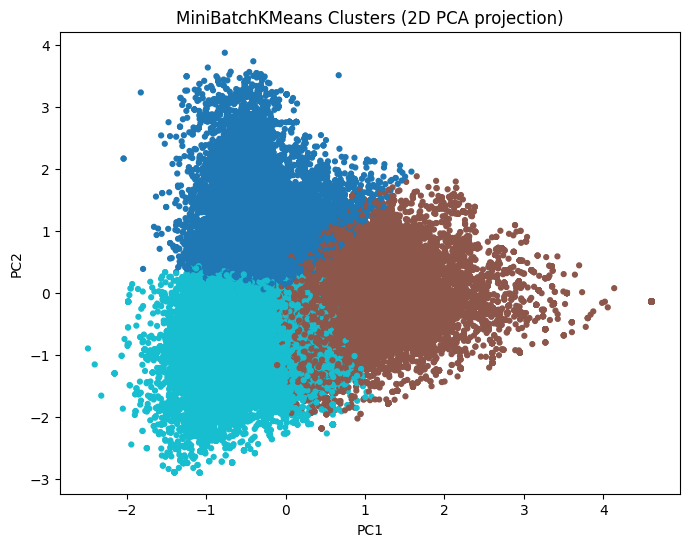

In [19]:
k = 3  # choose based on silhouette or elbow method
kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10)
product_type_df['cluster'] = kmeans.fit_predict(X_combined)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(random_state=42)
X_2d = pca.fit_transform(X_combined.toarray())  # convert sparse to dense if needed

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=product_type_df['cluster'], cmap='tab10', s=12)
plt.title("MiniBatchKMeans Clusters (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [58]:
# --- Define mapping for cluster labels ---
cluster_mapping = {
    0: "Cosmetics & Skincare",
    1: "Hair Styling & Care",
    2: "Lifestyle & Product Reviews"
}

# --- Apply mapping ---
product_type_df["cluster_label"] = product_type_df["cluster"].map(cluster_mapping)


In [64]:
print(product_type_df.columns)

Index(['videoId', 'channelId', 'hashtags_cleaned', 'cluster', 'cluster_label'], dtype='object')


In [68]:
product_type_df = product_type_df.drop(['title', 'description', 'tags','contentDuration',
                                        'topicNames', 'text', 'hashtags', 'clean_text',
                                        'duration_seconds', 'duration_hhmmss',], axis=1)

KeyError: "['title', 'description', 'tags', 'contentDuration', 'topicNames', 'text', 'hashtags', 'clean_text', 'duration_seconds', 'duration_hhmmss'] not found in axis"

In [69]:
# Save clusters to CSV
output_file = "product_type_classified.csv"
product_type_df.to_csv(output_file, index=False)

print(f"Clusters saved to {output_file}")


Clusters saved to product_type_classified.csv


# Identify Video Type

In [27]:
video_type_df = pd.read_csv("cleaned_data.csv")

In [38]:
print(video_type_df.columns)

Index(['videoId', 'publishedAt', 'channelId', 'title', 'description', 'tags',
       'contentDuration', 'viewCount', 'likeCount', 'favouriteCount',
       'commentCount', 'topicNames', 'text', 'hashtags', 'clean_text',
       'hashtags_cleaned', 'duration_seconds', 'duration_hhmmss',
       'video_type'],
      dtype='object')


In [53]:
video_type_keywords = {
    "Tutorial": [
        "tutorial", "howto", "how-to", "guide", "learn", "training", "course",
        "step", "routine", "beginners", "diy", "easy", "tips", "tricks", "hack", "hacks",
        "makeup", "skincare", "contour", "eyeliner", "brows", "hairstyle",
        "haircare", "keratin", "smoothing", "cut", "color", "styling",
        "straightener", "toner", "exfoliation", "gel", "mask", "sunscreen"
    ],
    "Review": [
        "review", "reviews", "unboxing", "haul", "recommendation", "feedback",
        "product", "products", "test", "comparison", "opinions", "services", "content",
        "try", "testing", "swatch", "glow", "cream", "foundation", "serum",
        "moisturizer", "perfume", "shampoo", "filler", "lotion", "spf", "toner",
        "nail", "lipliner", "concealer", "lashes", "mascara"
    ],
    "Tips": [
        "tips", "tricks", "hacks", "hack", "ideas", "secrets", "advice",
        "diy", "try", "glowup", "brightening", "antiaging", "confidence",
        "inspiration", "affordable", "best", "top", "must", "healthy", "setting",
        "clean", "smooth", "shine", "hydrated"
    ],
    "Vlog": [
        "vlog", "vlogs", "lifestyle", "daily", "journey", "routine", "stories",
        "life", "day", "blogger", "travel", "story", "everyday", "ootd", "follow",
        "content", "creator", "fashion", "outfit", "instagram", "insta", "reels",
        "tiktok", "youtube", "shorts", "song", "music", "vloglife", "page", "explore"
    ],
    "Transformation": [
        "transformation", "transform", "makeover", "beforeafter", "before", "after",
        "glowup", "transition", "aging", "antiaging", "wrinkles", "change", "cut",
        "dye", "highlights", "balay", "straightening", "blowout", "bleaching",
        "smoothing", "curls", "ombre", "keratin", "botox", "hairdo"
    ],
    "Product Showcase": [
        "shopping", "collection", "store", "amazon", "sephora", "launch", "sale",
        "discount", "showcase", "demo", "feature", "brand", "cosmetics", "fragrance",
        "perfume", "foundation", "lipstick", "eyeshadow", "mascara", "cream", "serum",
        "bronzer", "blush", "powder", "concealer", "lotion", "unboxing", "luxury",
        "loreal", "avon", "dior", "nars", "huda", "fenty", "kylie", "charlotte",
        "tilbury", "lakme", "rare", "trending", "accessories"
    ],
}


In [65]:
# --- Function to detect video type from hashtags ---
def detect_video_type(hashtags):
    hashtags = str(hashtags).lower()
    for vtype, keywords in video_type_keywords.items():
        for kw in keywords:
            if kw in hashtags:
                return vtype
    return "Other"  # fallback if no keyword matches

# --- Apply detection ---
video_type_df["video_type"] = video_type_df["hashtags_cleaned"].apply(detect_video_type)


In [71]:
video_type_df = video_type_df.drop(['title', 'description', 'tags','contentDuration',
                                    'topicNames', 'text', 'hashtags', 'clean_text',
                                    'duration_seconds', 'duration_hhmmss',
                                    'viewCount', 'likeCount', 'favouriteCount',
                                    'commentCount',], axis=1)

In [72]:
# --- Save result ---
video_type_df.to_csv("video_type_classified.csv", index=False)

# TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [32]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(min_df=5)  # top 100 words; adjust as needed
tfidf_matrix = vectorizer.fit_transform(product_type_df["hashtags_cleaned"].fillna(""))

# Get feature names (words)
words = vectorizer.get_feature_names_out()

# Sum TF-IDF scores across all rows to get overall importance in the column
scores = tfidf_matrix.sum(axis=0).A1  # convert matrix to 1D array

# Create DataFrame
tfidf_df = pd.DataFrame({"word": words, "tfidf_score": scores})

# Sort by score descending
tfidf_df = tfidf_df.sort_values(by="tfidf_score", ascending=False).reset_index(drop=True)

# Save to CSV
tfidf_df.to_csv("tfidf_text_column.csv", index=False)


Words Count

In [33]:
from collections import Counter

# Combine all rows into a single string
all_words = " ".join(product_type_df["hashtags_cleaned"].dropna()).split()

# Count occurrences of each word
word_counts = Counter(all_words)

# Convert Counter to DataFrame
word_count_df = pd.DataFrame(word_counts.items(), columns=["word", "count"])

# Sort by count descending
word_count_df = word_count_df.sort_values(by="count", ascending=False).reset_index(drop=True)

# Save word counts to CSV
word_count_df.to_csv("word_counts.csv", index=False)

total_words = len(all_words)
print(f"Total words across all videos: {total_words}")

print("Saved word counts to word_counts.csv")


Total words across all videos: 1618563
Saved word counts to word_counts.csv


Row Counts

In [34]:
# Suppose your column is "text"
column_name = "hashtags_cleaned"

# Initialize a Counter to store document frequency
df_counts = Counter()

# Iterate through each row
for text in product_type_df[column_name].dropna():
    words = set(text.split())  # use set to count each word only once per row
    df_counts.update(words)

# Convert to DataFrame
df_frequency = pd.DataFrame(df_counts.items(), columns=["word", "row_count"])
df_frequency = df_frequency.sort_values(by="row_count", ascending=False).reset_index(drop=True)

df_frequency.to_csv("document_frequency.csv", index=False)

print("Save word counts to df_frequency.csv")


Save word counts to df_frequency.csv
